<a href="https://colab.research.google.com/github/komalck/project/blob/master/Facial_emotion_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing FER 2013 dataset from Google Drive

from google.colab import drive
drive.mount('/content/drive')

from zipfile import ZipFile
file_name = "/content/drive/My Drive/archive.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")

Mounted at /content/drive
Done


In [2]:
#Libraries

#For modifying images & training model
import numpy as np #convert img to high speed arrays
import cv2 #capturing & displaying images
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

import keras.utils as image
import matplotlib.pyplot as plt #Display image through graph plots

#For saving and loading pretrained models
import tensorflow as tf
from keras.models import load_model

#For capturing webcam content & displaying it on Google Colab
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import PIL
import io
import html
import time

In [3]:
# Separating training & testing data from FER 2013 dataset

train_dir = 'train'
val_dir = 'test'
train_datagen = ImageDataGenerator(rescale=1./255) #normalizing dataset
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [4]:
#Configuring model by adding convolutional layers and max pooling data

emotion_model = Sequential()
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

In [5]:
#Transfer Learning by model fitting

emotion_model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])
emotion_model_info = emotion_model.fit_generator(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=150, #Number of cycles model training runs
        validation_data=validation_generator,
        validation_steps=7178 // 64)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
<ipython-input-5-45be59772506>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  emotion_model_info = emotion_model.fit_generator(


Epoch 1/150
448/448 [==============================] - 27s 35ms/step - loss: 1.8081 - accuracy: 0.2539 - val_loss: 1.7480 - val_accuracy: 0.3245
Epoch 2/150
448/448 [==============================] - 14s 32ms/step - loss: 1.6541 - accuracy: 0.3531 - val_loss: 1.5754 - val_accuracy: 0.3987
Epoch 3/150
448/448 [==============================] - 15s 33ms/step - loss: 1.5606 - accuracy: 0.3992 - val_loss: 1.5084 - val_accuracy: 0.4252
Epoch 4/150
448/448 [==============================] - 15s 33ms/step - loss: 1.4948 - accuracy: 0.4271 - val_loss: 1.4437 - val_accuracy: 0.4492
Epoch 5/150
448/448 [==============================] - 15s 34ms/step - loss: 1.4375 - accuracy: 0.4516 - val_loss: 1.3853 - val_accuracy: 0.4787
Epoch 6/150
448/448 [==============================] - 18s 39ms/step - loss: 1.3907 - accuracy: 0.4700 - val_loss: 1.3455 - val_accuracy: 0.4887
Epoch 7/150
448/448 [==============================] - 14s 32ms/step - loss: 1.3491 - accuracy: 0.4861 - val_loss: 1.3139 - val_ac

In [6]:
# Saving the model

emotion_model.save('saved_model/model.h5')
new_model = tf.keras.models.load_model('saved_model/model.h5')

In [30]:
# Return model prediction

def emotion_analysis(emotions):
    objects = {0:'sad', 1:'disgust', 2:'fear',
               3:'angry', 4:'neutral', 5:'happy',
               6: 'surprise'}
    return objects[(np.argmax(emotions))]


In [31]:
# Capturing image on Google Colab

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

take_photo()

<IPython.core.display.Javascript object>

'photo.jpg'

OpenCV(4.8.0) /io/opencv/modules/objdetect/src/cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'detectMultiScale'

happy


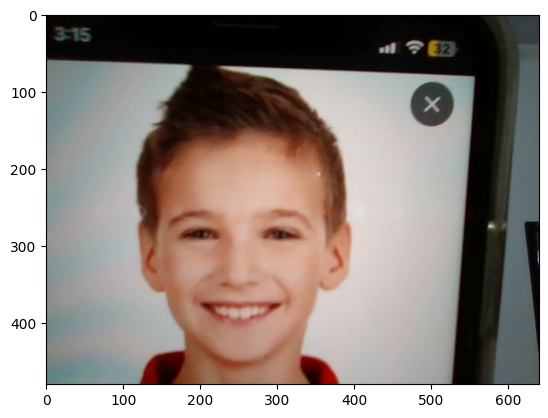

In [32]:
#Cropping face for model prediction

def facecrop(image):
    facedata = '/content/haarcascade_frontalface_alt.xml'
    cascade = cv2.CascadeClassifier(facedata)

    img = cv2.imread(image)

    try:

        minisize = (img.shape[1],img.shape[0])
        miniframe = cv2.resize(img, minisize)

        faces = cascade.detectMultiScale(miniframe)

        for f in faces:
            x, y, w, h = [ v for v in f ]
            cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

            sub_face = img[y:y+h, x:x+w]


            cv2.imwrite('capture.jpg', sub_face)

    except Exception as e:
        print (e)

if __name__ == '__main__':
    facecrop('/content/photo.jpg')

file = '/content/photo.jpg'
true_image = image.load_img(file)
img = image.load_img(file, color_mode="grayscale", target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255 #normalizing image

custom = emotion_model.predict(x,verbose=0)
print(emotion_analysis(custom))

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.imshow(true_image)
plt.show()

In [33]:
# function to convert JavaScript data to image
def js_to_image(js_reply):
  image_bytes = b64decode(js_reply.split(',')[1]) # decode base64 image
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8) # convert bytes to numpy array
  img = cv2.imdecode(jpg_as_np, flags=1) # decode numpy array into OpenCV BGR image
  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA') # convert array into PIL image
  iobuf = io.BytesIO()
  bbox_PIL.save(iobuf, format='png') # format bbox into png for return
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8'))) # format return string

  return bbox_bytes

face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')) #detect face

In [34]:
# Video capture for Google Colab & display UI

def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const winTitle = document.createElement('div');
      winTitle.innerHTML = "<span>Emotion Recognition System</span>";
      winTitle.style.fontWeight = 'bold';
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Mood Detected: </span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(winTitle);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: ghostwhite;">' +
          'Click here or on the video to stop.</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [35]:
#Start video capture & check model prediction

video_stream()

label_html = 'Not detected'
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    img = js_to_image(js_reply["img"])
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # grayscale image for face detection

    faces = face_cascade.detectMultiScale(gray)
    for (x,y,w,h) in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(0,255,255),2)
      img=cv2.resize(img,(48,48))
      try:
        img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
      except Exception as e:
        pass
      x = image.img_to_array(img)
      x = np.expand_dims(x, axis = 0)
      x /= 255 #normalizing data

      custom = emotion_model.predict(x,verbose=0)
      label_html=emotion_analysis(custom)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    bbox_bytes = bbox_to_bytes(bbox_array)
    bbox = bbox_bytes

<IPython.core.display.Javascript object>